In [254]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from konlpy.tag import Kkma
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import sklearn
import pickle as pickle


In [255]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1

In [256]:

test_data = pd.read_csv('../data/dataset/test/test_data.csv')
test_data['object_type'] = test_data.object_entity.apply(lambda x: whatType(x))
test_data['subject_type'] = test_data.subject_entity.apply(lambda x: whatType(x))
test_data['fast']= test_data.id.apply(lambda x: when_start(test_data['object_entity'].loc[x],test_data['subject_entity'].loc[x]))
test_data.head()


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree,ORG,ORG,0
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia,POH,PER,0
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia,DAT,ORG,1
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,PER,PER,1
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree,PER,ORG,0


In [257]:

train_data = pd.read_csv('../data/dataset/train/train.csv')
train_data['object_type'] = train_data.object_entity.apply(lambda x: whatType(x))
train_data['subject_type'] = train_data.subject_entity.apply(lambda x: whatType(x))
train_data['fast']= train_data.id.apply(lambda x: when_start(train_data['object_entity'].loc[x],train_data['subject_entity'].loc[x]))
train_data.head()


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,1
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,1
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,0
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,0
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,1


Text(0.5, 0, 'train')

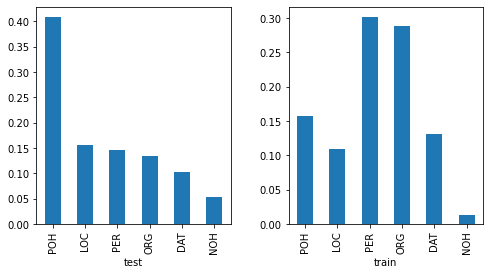

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes= axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)


test_data.object_type.value_counts(normalize=True).plot(kind= 'bar', ax= axes[0])
axes[0].set_xlabel('test')
train_data.object_type.value_counts(normalize=True).reindex(test_data.object_type.value_counts().index).plot(kind= 'bar', ax= axes[1])
axes[1].set_xlabel('train')

    

In [260]:
train_data.object_type.value_counts(normalize=True)

object_type
PER    0.301447
ORG    0.287835
POH    0.157468
DAT    0.130859
LOC    0.109670
NOH    0.012719
Name: proportion, dtype: float64

In [261]:
test_data.object_type.value_counts(normalize=True)


object_type
POH    0.408371
LOC    0.155055
PER    0.146555
ORG    0.134836
DAT    0.101739
NOH    0.053445
Name: proportion, dtype: float64

In [262]:
test_data.object_type.value_counts(normalize=True)/train_data.object_type.value_counts(normalize=True)

object_type
DAT    0.777466
LOC    1.413824
NOH    4.201834
ORG    0.468448
PER    0.486171
POH    2.593351
Name: proportion, dtype: float64

In [263]:
train_data.object_type.unique()

array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object)

In [264]:
train_data.object_type.value_counts()

object_type
PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
Name: count, dtype: int64

In [265]:
test_data.object_type.value_counts(normalize=True)

object_type
POH    0.408371
LOC    0.155055
PER    0.146555
ORG    0.134836
DAT    0.101739
NOH    0.053445
Name: proportion, dtype: float64

In [266]:
x

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
7,7,"박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...","{'word': '박용오', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1937년 4월 29일', 'start_idx': 9, 'end_...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
45,45,영국의 제임스 클라크 로스(1800년 ~ 1862년) 경은 1839년 10월 ‘에레...,"{'word': '제임스 클라크 로스', 'start_idx': 4, 'end_id...","{'word': '1800년 ~ 1862년', 'start_idx': 15, 'en...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
62,62,"김동성(金東聖, 1980년 2월 9일 ~)은 대한민국의 쇼트트랙 선수이다.","{'word': '김동성', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1980년 2월 9일', 'start_idx': 9, 'end_i...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
185,185,"한상길(1987년 9월 5일 ~)은 대한민국의 남자 배구 선수이며, 인천 대한항공 ...","{'word': '한상길', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1987년 9월 5일', 'start_idx': 4, 'end_i...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
189,189,안효섭(1995년 4월 17일 ~)은 대한민국에서 활동하는 캐나다 국적의 배우이다.,"{'word': '안효섭', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1995년 4월 17일', 'start_idx': 4, 'end_...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
...,...,...,...,...,...,...,...,...,...,...
32370,32370,"가게야마 히로노부(1961년 2월 18일~)는 오사카부 출신의 남성 가수, 작사자,...","{'word': '가게야마 히로노부', 'start_idx': 0, 'end_idx...","{'word': '1961년 2월 18일', 'start_idx': 10, 'end...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
32408,32408,변인선(1946년 3월 11일 ~ 2015년 1월 14일)은 조선민주주의인민공화국의...,"{'word': '변인선', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1946년 3월 11일', 'start_idx': 4, 'end_...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
32424,32424,"김규항(1962년 ~)은 대한민국의 작가, 출판인, 칼럼니스트이다.","{'word': '김규항', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1962년', 'start_idx': 4, 'end_idx': 8...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926
32436,32436,"엔리케 4세(Enrique IV, 1425년 1월 5일 ~ 1474년 12월 11일...","{'word': '엔리케 4세', 'start_idx': 0, 'end_idx': ...","{'word': '1425년 1월 5일', 'start_idx': 19, 'end_...",per:date_of_birth,wikipedia,DAT,PER,0,0.185926


In [267]:
x=  test_data.object_type.value_counts()/train_data.object_type.value_counts()
print(x)
train_data['weights'] = None
for val,idx in zip(x.values, x.index):
    train_data['weights'].loc[train_data[train_data['object_type']==idx].index] = val
train_data.weights


object_type
DAT    0.185926
LOC    0.338107
NOH    1.004843
ORG    0.112027
PER    0.116265
POH    0.620184
Name: count, dtype: float64


<ipython-input-267-dae2f9f80107>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['weights'].loc[train_data[train_data['object_type']==idx].index] = val
<ipython-input-267-dae2f9f80107>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['weights'].loc[train_data[train_data['object_type']==idx].index] = val
<ipython-input-267-dae2f9f80107>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['weights'].loc[tra

0        0.116265
1        0.112027
2        0.112027
3        0.116265
4        0.185926
           ...   
32465    0.338107
32466    0.116265
32467    0.116265
32468    0.112027
32469    0.116265
Name: weights, Length: 32470, dtype: object

In [268]:
train_data.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,1,0.116265
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,1,0.112027
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,0,0.112027
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,0,0.116265
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,1,0.185926


Text(0.5, 0, 'dev')

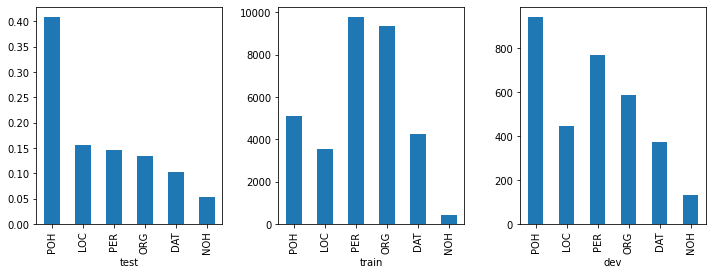

In [269]:
dev = train_data.groupby(['label']).sample(frac = 0.1, weights='weights',random_state=42)
dev

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes= axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)


test_data.object_type.value_counts(normalize=True).plot(kind= 'bar', ax= axes[0])
axes[0].set_xlabel('test')
train_data.object_type.value_counts().reindex(test_data.object_type.value_counts().index).plot(kind= 'bar', ax= axes[1])
axes[1].set_xlabel('train')
dev.object_type.value_counts().reindex(test_data.object_type.value_counts().index).plot(kind= 'bar', ax= axes[2])
axes[2].set_xlabel('dev')

    

In [270]:
reform_train = train_data.drop(dev.index)
print(dev.shape,reform_train.shape)

(3248, 10) (29222, 10)


In [271]:
reform_train.object_type.value_counts(), dev.object_type.value_counts()

(object_type
 PER    9020
 ORG    8758
 POH    4172
 DAT    3876
 LOC    3114
 NOH     282
 Name: count, dtype: int64,
 object_type
 POH    941
 PER    768
 ORG    588
 LOC    447
 DAT    373
 NOH    131
 Name: count, dtype: int64)

In [272]:
reform_train.to_csv('../data/dataset/train/reform_train.csv')
dev.to_csv('../data/dataset/train/reform_dev.csv')

In [273]:
train_data.label.value_counts()

label
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [274]:
train_data.object_type.value_counts(normalize=True).reindex(test_data.object_type.value_counts().index)

object_type
POH    0.157468
LOC    0.109670
PER    0.301447
ORG    0.287835
DAT    0.130859
NOH    0.012719
Name: proportion, dtype: float64

In [275]:
train_data.object_type.value_counts()

object_type
PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
Name: count, dtype: int64

<Axes: xlabel='object_type'>

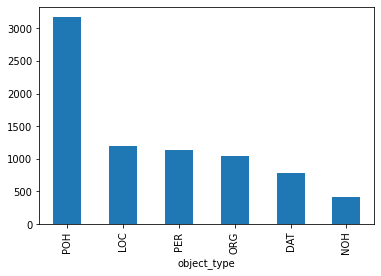

In [276]:
test_data.object_type.value_counts().plot(kind= 'bar')

<Axes: xlabel='object_type'>

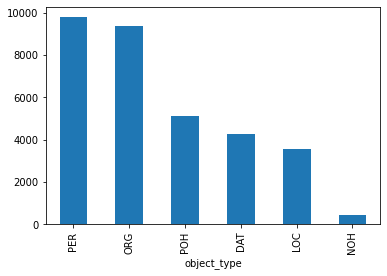

In [277]:
train_data.object_type.value_counts().plot(kind= 'bar')


<Axes: xlabel='subject_type'>

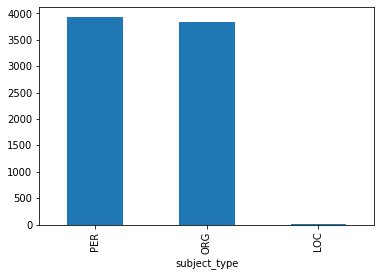

In [278]:
test_data.subject_type.value_counts().plot(kind= 'bar')


<Axes: xlabel='subject_type,object_type'>

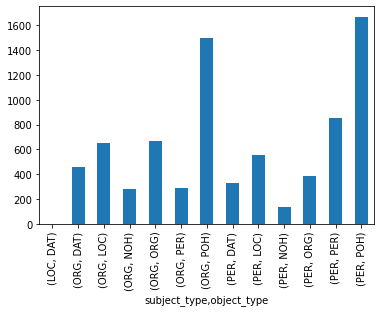

In [279]:
test_data.groupby(['subject_type','object_type']).count().id.plot(kind='bar')


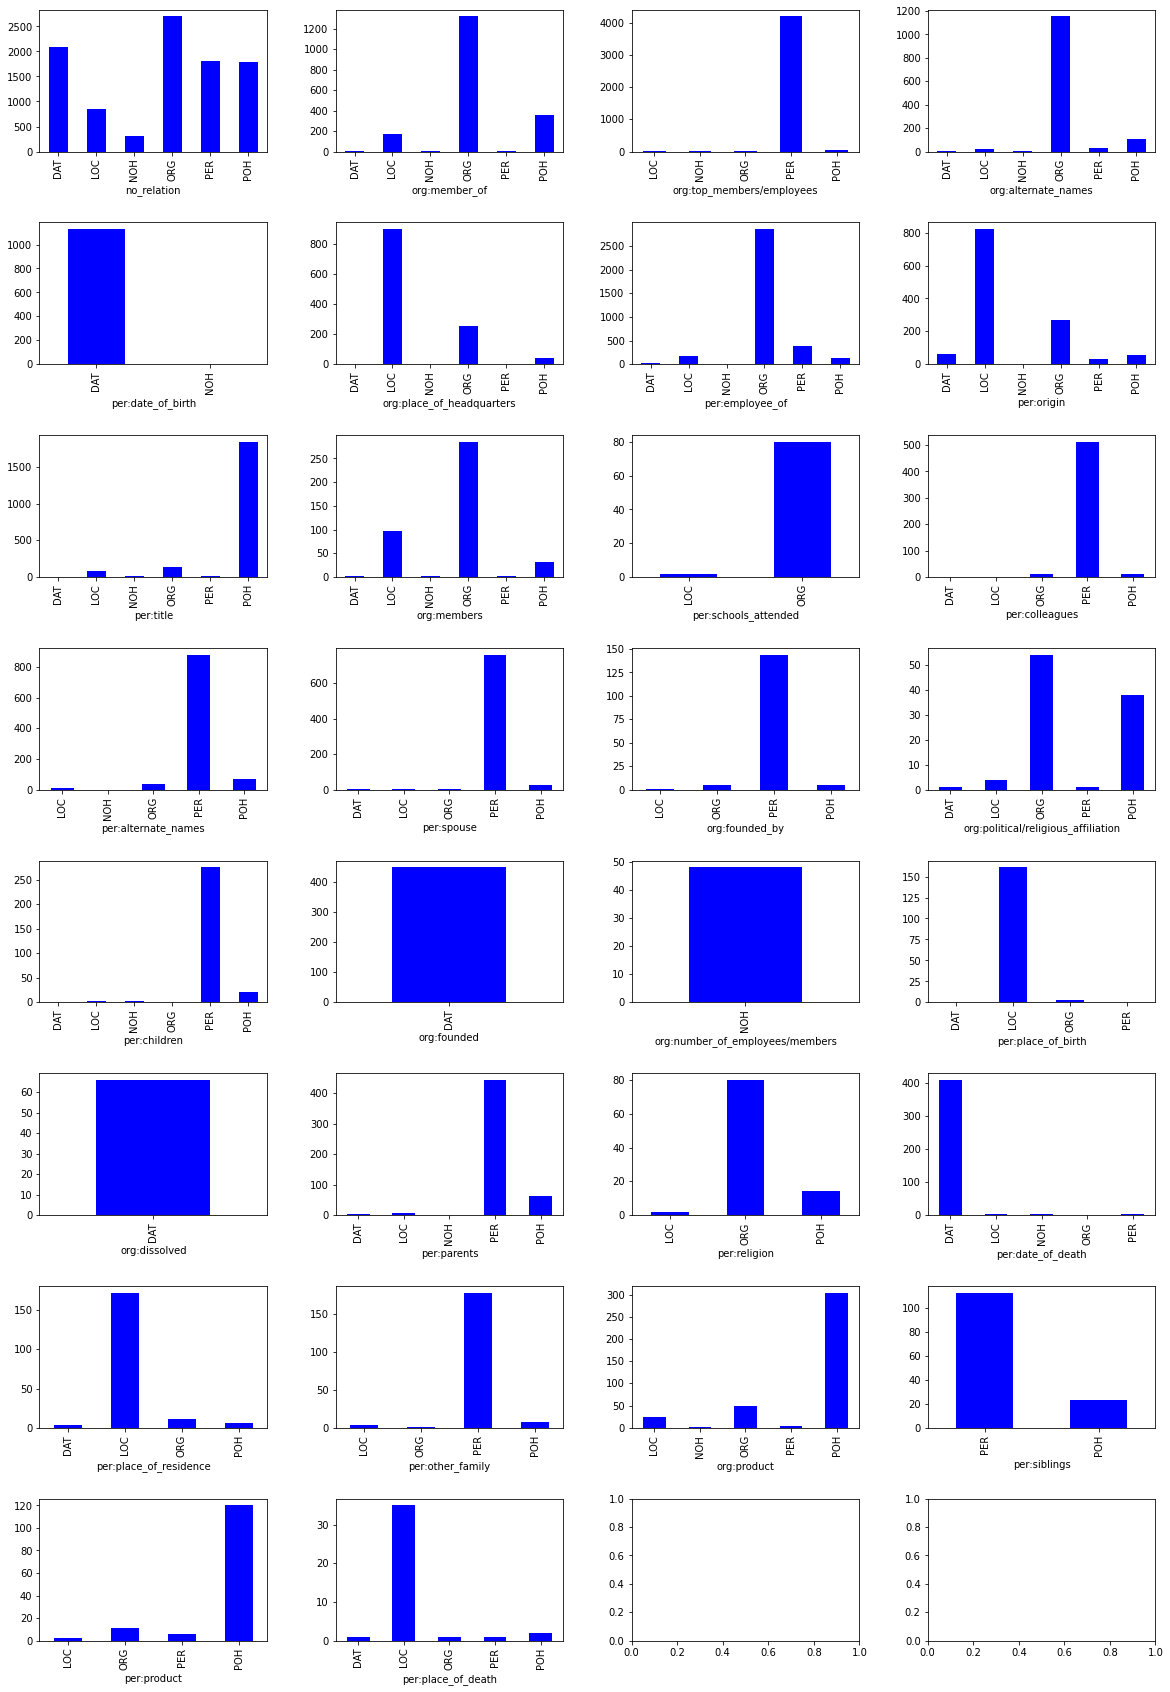

In [280]:
fig, axes = plt.subplots(8, 4, figsize=(20, 30))
axes= axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
i=0
for num, label in enumerate(train_data.label.unique()):
    chart =train_data[(train_data.label == label)]
    
    chart.groupby(['object_type']).count().id.plot(kind='bar', color='b',ax=axes[num])
    axes[num].set_xlabel(label)
    i+=1

In [281]:
x= train_data[(train_data.label == 'per:place_of_death') & (train_data.object_type != 'LOC')]
x

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
4421,4421,김창완과 그의 두 형제들로 구성되었던 그룹 산울림의 멤버이자 3형제 중 막내였던 김...,"{'word': '김창익', 'start_idx': 45, 'end_idx': 47...","{'word': '캐나다 벤쿠버', 'start_idx': 59, 'end_idx'...",per:place_of_death,wikipedia,ORG,PER,0,0.112027
11019,11019,선의왕후 어씨는 본관이 함종(咸從)으로 영조 6년(1730) 6월 29일 경희궁 어...,"{'word': '선의왕후', 'start_idx': 0, 'end_idx': 3,...","{'word': '경희궁 어조당(魚藻堂)', 'start_idx': 41, 'end...",per:place_of_death,wikipedia,POH,PER,0,0.620184
15970,15970,"그러나 이스마일 2세는 , 카즈빈의 궁성에서 아편 중독으로 사망하였다.","{'word': '이스마일 2세', 'start_idx': 4, 'end_idx':...","{'word': '카즈빈', 'start_idx': 15, 'end_idx': 17...",per:place_of_death,wikipedia,PER,PER,0,0.116265
29266,29266,묵돌이 선우가 된 209년에는 진시황이 사망한 직후였으며 이로 인해 진나라가 큰 혼...,"{'word': '진시황', 'start_idx': 17, 'end_idx': 19...","{'word': '진나라', 'start_idx': 38, 'end_idx': 40...",per:place_of_death,wikipedia,DAT,PER,0,0.185926
30987,30987,1593년 6월 2차 진주성 전투에서 진주성이 함락되자 의병장인 김천일·고종후와 함...,"{'word': '고종후', 'start_idx': 40, 'end_idx': 42...","{'word': '진주성', 'start_idx': 12, 'end_idx': 14...",per:place_of_death,wikitree,POH,PER,1,0.620184


In [282]:
train_data[(train_data.subject_type == 'PER')].label.unique()

array(['per:date_of_birth', 'per:employee_of', 'per:origin', 'per:title',
       'no_relation', 'per:schools_attended', 'per:colleagues',
       'per:alternate_names', 'per:spouse', 'per:children',
       'per:place_of_birth', 'per:parents', 'per:religion',
       'per:date_of_death', 'per:place_of_residence', 'per:other_family',
       'per:siblings', 'per:product', 'per:place_of_death', 'org:members',
       'org:top_members/employees', 'org:founded_by',
       'org:place_of_headquarters'], dtype=object)

In [283]:
train_data[(train_data.subject_type == 'ORG')].label.unique()


array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'org:place_of_headquarters', 'org:members',
       'org:founded_by', 'org:political/religious_affiliation',
       'org:founded', 'org:number_of_employees/members', 'org:dissolved',
       'org:product'], dtype=object)

In [285]:
# train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:top_members/employees')]
x= train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:top_members/employees')]
for i in x.index:
    print(i)
    y=x.loc[i]
    print("subject : ", y.subject_entity, "  object : ",y.object_entity,'\n',
          y.sentence)

14958
subject :  {'word': '2AM', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}   object :  {'word': '정진운', 'start_idx': 10, 'end_idx': 12, 'type': 'PER'} 
 그룹 2AM 출신 정진운 씨와 나인뮤지스 출신 경리가 열애를 인정한 가운데 두 사람이 듀엣곡을 작업하면서 인연을 맺게 됐다는 측근 증언이 전해졌다.


In [286]:
x= train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:founded_by')]
for i in x.index:
    print(i)
    y=x.loc[i]
    print("subject : ", y.subject_entity, "  object : ",y.object_entity,'\n',
          y.sentence)


21482
subject :  {'word': '압둘라 1세', 'start_idx': 14, 'end_idx': 19, 'type': 'PER'}   object :  {'word': '요르단', 'start_idx': 30, 'end_idx': 32, 'type': 'LOC'} 
 1921년 하심가 출신인 압둘라 1세를 영입하여 트란스요르단을 세웠고, 제2차 세계 대전 이후인 1946년 영국으로부터 독립하였다.


In [287]:
x= train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:place_of_headquarters')]
for i in x.index:
    print(i)
    y=x.loc[i]
    print("subject : ", y.subject_entity, "  object : ",y.object_entity,'\n',
          y.sentence)

28891
subject :  {'word': '키예프', 'start_idx': 26, 'end_idx': 28, 'type': 'PER'}   object :  {'word': '우크라이나', 'start_idx': 90, 'end_idx': 94, 'type': 'LOC'} 
 이렇게 싹튼 우크라이나 민족주의는 19세기 초 키예프를 중심으로 제정 러시아의 지배에서로의 해방을 목적으로 하는 정치적 운동으로 발전하였는데 여기서 주요 인물은 우크라이나의 민족 시인 타라스 셰우첸코이다.


In [288]:
x= train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:members')]
for i in x.index:
    print(i)
    y=x.loc[i]
    print("subject : ", y.subject_entity, "  object : ",y.object_entity,'\n',
          y.sentence)

3118
subject :  {'word': '소녀시대', 'start_idx': 23, 'end_idx': 26, 'type': 'PER'}   object :  {'word': '소녀시대-Oh!GG', 'start_idx': 40, 'end_idx': 49, 'type': 'PER'} 
 이후 태연, 써니, 효연, 유리, 윤아로 소녀시대의 두 번째 유닛 그룹 소녀시대-Oh!GG를 결성하였으며, 9월 5일 첫 싱글 앨범 《몰랐니(Lil' Touch)》를 발표했다.


In [289]:
train_data[(train_data.subject_type == 'ORG')].label.unique()

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'org:place_of_headquarters', 'org:members',
       'org:founded_by', 'org:political/religious_affiliation',
       'org:founded', 'org:number_of_employees/members', 'org:dissolved',
       'org:product'], dtype=object)

In [290]:
train_data[(train_data.subject_type == 'PER') & (train_data.label ==  'org:founded_by')]

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
21482,21482,"1921년 하심가 출신인 압둘라 1세를 영입하여 트란스요르단을 세웠고, 제2차 세계...","{'word': '압둘라 1세', 'start_idx': 14, 'end_idx':...","{'word': '요르단', 'start_idx': 30, 'end_idx': 32...",org:founded_by,wikipedia,LOC,PER,0,0.338107


In [291]:
x['sentence']
for i in x['sentence']:
    print(i)

이후 태연, 써니, 효연, 유리, 윤아로 소녀시대의 두 번째 유닛 그룹 소녀시대-Oh!GG를 결성하였으며, 9월 5일 첫 싱글 앨범 《몰랐니(Lil' Touch)》를 발표했다.


In [292]:
for i in train_data[(train_data.object_type == 'POH')]['object_entity']:
    print(i)

{'word': '싱어송라이터', 'start_idx': 53, 'end_idx': 58, 'type': 'POH'}
{'word': '1루수', 'start_idx': 23, 'end_idx': 25, 'type': 'POH'}
{'word': 'Voice of America', 'start_idx': 73, 'end_idx': 88, 'type': 'POH'}
{'word': '국악인', 'start_idx': 70, 'end_idx': 72, 'type': 'POH'}
{'word': '만화가', 'start_idx': 16, 'end_idx': 18, 'type': 'POH'}
{'word': '작곡가', 'start_idx': 127, 'end_idx': 129, 'type': 'POH'}
{'word': '공화제', 'start_idx': 32, 'end_idx': 34, 'type': 'POH'}
{'word': '외야수', 'start_idx': 20, 'end_idx': 22, 'type': 'POH'}
{'word': '대변인', 'start_idx': 22, 'end_idx': 24, 'type': 'POH'}
{'word': '뮤지컬 배우', 'start_idx': 4, 'end_idx': 9, 'type': 'POH'}
{'word': '낭만주의', 'start_idx': 78, 'end_idx': 81, 'type': 'POH'}
{'word': '반도체', 'start_idx': 20, 'end_idx': 22, 'type': 'POH'}
{'word': '골키퍼', 'start_idx': 23, 'end_idx': 25, 'type': 'POH'}
{'word': '무원대장군', 'start_idx': 56, 'end_idx': 60, 'type': 'POH'}
{'word': '진도개', 'start_idx': 5, 'end_idx': 7, 'type': 'POH'}
{'word': '영화감독', 'start_idx': 81, '

{'word': '아나운서', 'start_idx': 20, 'end_idx': 23, 'type': 'POH'}
{'word': '한국어', 'start_idx': 31, 'end_idx': 33, 'type': 'POH'}
{'word': '이누야샤', 'start_idx': 3, 'end_idx': 6, 'type': 'POH'}
{'word': 'UEFA', 'start_idx': 87, 'end_idx': 90, 'type': 'POH'}
{'word': '질병관리본부장', 'start_idx': 20, 'end_idx': 26, 'type': 'POH'}
{'word': '오른발', 'start_idx': 63, 'end_idx': 65, 'type': 'POH'}
{'word': '유튜버', 'start_idx': 6, 'end_idx': 8, 'type': 'POH'}
{'word': '독립운동가', 'start_idx': 29, 'end_idx': 33, 'type': 'POH'}
{'word': 'K리그 클래식', 'start_idx': 132, 'end_idx': 138, 'type': 'POH'}
{'word': '유격수', 'start_idx': 9, 'end_idx': 11, 'type': 'POH'}
{'word': 'UEFA', 'start_idx': 58, 'end_idx': 61, 'type': 'POH'}
{'word': '학부모님', 'start_idx': 31, 'end_idx': 34, 'type': 'POH'}
{'word': '박세진', 'start_idx': 3, 'end_idx': 5, 'type': 'POH'}
{'word': '바베이도스', 'start_idx': 27, 'end_idx': 31, 'type': 'POH'}
{'word': '공화국 전투찬가', 'start_idx': 1, 'end_idx': 8, 'type': 'POH'}
{'word': '기계공학자', 'start_idx': 68, 'end_

In [293]:
train_data.iloc[[14958,19431]]

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
14958,14958,그룹 2AM 출신 정진운 씨와 나인뮤지스 출신 경리가 열애를 인정한 가운데 두 사람...,"{'word': '2AM', 'start_idx': 3, 'end_idx': 5, ...","{'word': '정진운', 'start_idx': 10, 'end_idx': 12...",org:top_members/employees,wikitree,PER,PER,0,0.116265
19431,19431,그룹 2AM 출신 정진운 씨와 나인뮤지스 출신 경리가 열애를 인정한 가운데 두 사람...,"{'word': '정진운', 'start_idx': 10, 'end_idx': 12...","{'word': '2AM', 'start_idx': 3, 'end_idx': 5, ...",per:origin,wikitree,PER,PER,1,0.116265


In [294]:
duple = train_data[train_data.duplicated('sentence')]
duple[duple.sentence == '반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장에 이름을 올렸다.']

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
32451,32451,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...",per:parents,wikipedia,PER,PER,1,0.116265


In [295]:
train_data[train_data.sentence== '반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장에 이름을 올렸다.']

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
20513,20513,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...",per:children,wikipedia,PER,PER,0,0.116265
32451,32451,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...",per:parents,wikipedia,PER,PER,1,0.116265


In [296]:
duple

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
229,229,자의왕후는 문무왕과의 사이에서 소명태자와 훗날 신문왕이 되는 정명태자를 낳았다.,"{'word': '신문왕', 'start_idx': 26, 'end_idx': 28...","{'word': '문무왕', 'start_idx': 6, 'end_idx': 8, ...",per:parents,wikipedia,PER,PER,1,0.116265
612,612,"이후 새천년민주당은 다른 세력들과 이합집산을 거듭한 끝에 더불어민주당이 되고, 통합...","{'word': '민주당', 'start_idx': 35, 'end_idx': 37...","{'word': '민중당', 'start_idx': 81, 'end_idx': 83...",no_relation,wikipedia,ORG,ORG,0,0.112027
830,830,2016년 10월 30일 FC 안양과의 최종전서 승리를 거두며 2016년 K리그 챌...,"{'word': '안산 무궁화 축구단', 'start_idx': 60, 'end_i...","{'word': '2016년', 'start_idx': 35, 'end_idx': ...",no_relation,wikipedia,DAT,ORG,1,0.185926
948,948,푸블리우스 아일리우스 트라야누스 하드리아누스(76년 1월 24일~138년 7월 10...,"{'word': '트라야누스', 'start_idx': 12, 'end_idx': ...","{'word': '로마 제국', 'start_idx': 50, 'end_idx': ...",per:origin,wikipedia,LOC,PER,0,0.338107
998,998,일본 총독이 수작(受爵) 승인서를 내밀고 도장 찍기를 강요하니까 그 아들 이직각(李...,"{'word': '이기원', 'start_idx': 58, 'end_idx': 60...","{'word': '이봉의', 'start_idx': 50, 'end_idx': 52...",per:parents,wikipedia,PER,PER,1,0.116265
...,...,...,...,...,...,...,...,...,...,...
32451,32451,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...",per:parents,wikipedia,PER,PER,1,0.116265
32454,32454,신라에서는 중기까지도 지배계층의 가계계승에 있어서 모계적인 경향이 그대로 존속되었고...,"{'word': '선덕여왕', 'start_idx': 101, 'end_idx': ...","{'word': '진덕여왕', 'start_idx': 95, 'end_idx': 9...",no_relation,wikipedia,PER,PER,1,0.116265
32463,32463,"그의 외삼촌은 루이 13세로, 남편인 루이 14세는 외사촌 오빠가 된다.","{'word': '루이 14세', 'start_idx': 21, 'end_idx':...","{'word': '루이 13세', 'start_idx': 8, 'end_idx': ...",per:other_family,wikipedia,PER,PER,1,0.116265
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,LOC,PER,0,0.338107


In [297]:
set_sentence =set()
for x in train_data[train_data.duplicated('sentence')]['sentence']:
    
    set_sentence.add(x)

In [298]:
no_rel = [] 
for x in set_sentence:
    dup = train_data[train_data.sentence == x]
    if dup.shape[0]==2:
        # if dup.iloc[0]
        if dup.iloc[0].subject_entity == dup.iloc[1].object_entity and dup.iloc[0].object_entity == dup.iloc[1].subject_entity:
            # if (dup.iloc[0].label == 'no_relation' or dup.iloc[1].label == 'no_relation') and not ((dup.iloc[0].label == 'no_relation' and dup.iloc[1].label == 'no_relation')):
            if ((dup.iloc[0].label == 'no_relation' and dup.iloc[1].label == 'no_relation')):
                # print(dup.iloc[0].label, dup.iloc[1].label)
                no_rel.append(dup.index)
                
no_rel

[Index([24710, 31814], dtype='int64'),
 Index([12412, 19085], dtype='int64'),
 Index([12129, 29992], dtype='int64'),
 Index([1619, 14855], dtype='int64'),
 Index([11066, 16334], dtype='int64'),
 Index([24490, 32137], dtype='int64'),
 Index([3215, 19004], dtype='int64'),
 Index([2648, 9132], dtype='int64'),
 Index([8637, 28114], dtype='int64'),
 Index([18532, 23801], dtype='int64'),
 Index([21423, 24442], dtype='int64'),
 Index([3322, 6944], dtype='int64'),
 Index([16883, 23373], dtype='int64'),
 Index([15493, 26731], dtype='int64'),
 Index([4884, 14481], dtype='int64'),
 Index([652, 19593], dtype='int64'),
 Index([9781, 17437], dtype='int64'),
 Index([7106, 10950], dtype='int64'),
 Index([26011, 29685], dtype='int64'),
 Index([10207, 15865], dtype='int64'),
 Index([15091, 15597], dtype='int64'),
 Index([572, 19671], dtype='int64'),
 Index([2469, 13615], dtype='int64'),
 Index([11269, 19276], dtype='int64'),
 Index([6739, 32390], dtype='int64'),
 Index([20891, 21488], dtype='int64'),
 I

In [299]:
len(no_rel)

166

In [300]:
set_label= set()
for x in set_sentence:
    dup = train_data[train_data.sentence == x]
    if dup.shape[0]==2:
        # if dup.iloc[0]
        if dup.iloc[0].subject_entity == dup.iloc[1].object_entity and dup.iloc[0].object_entity == dup.iloc[1].subject_entity:
            # if (dup.iloc[0].label == 'no_relation' or dup.iloc[1].label == 'no_relation') and not ((dup.iloc[0].label == 'no_relation' and dup.iloc[1].label == 'no_relation')):
            if ((dup.iloc[0].label == 'no_relation' and dup.iloc[1].label == 'no_relation')):
                # print(dup.iloc[0].label, dup.iloc[1].label)
                print(dup)
            b= tuple([dup.iloc[0].label, dup.iloc[0].object_type])
            c= tuple([dup.iloc[1].label, dup.iloc[1].object_type])
            a=[b,c]
            a.sort()
            a=tuple(a)
            set_label.add(a)
                # x.add(dup.iloc[1].label)
# set_label
        # print(dup[['object_entity','subject_entity','label']] )

          id                                           sentence  \
24710  24710  K리그에서는 2016년부터 K리그 클래식과 K리그 챌린지에서 뛰게 될 신인 선수들을...   
31814  31814  K리그에서는 2016년부터 K리그 클래식과 K리그 챌린지에서 뛰게 될 신인 선수들을...   

                                          subject_entity  \
24710  {'word': 'K리그 챌린지', 'start_idx': 24, 'end_idx'...   
31814  {'word': 'K리그 클래식', 'start_idx': 15, 'end_idx'...   

                                           object_entity        label  \
24710  {'word': 'K리그 클래식', 'start_idx': 15, 'end_idx'...  no_relation   
31814  {'word': 'K리그 챌린지', 'start_idx': 24, 'end_idx'...  no_relation   

          source object_type subject_type  fast   weights  
24710  wikipedia         ORG          ORG     1  0.112027  
31814  wikipedia         ORG          ORG     0  0.112027  
          id                                           sentence  \
12412  12412  그는 악티늄을 마리 퀴리와 피에르 퀴리가 라듐을 채취하고 남은 우란광 잔여물에서 채...   
19085  19085  그는 악티늄을 마리 퀴리와 피에르 퀴리가 라듐을 채취하고 남은 우란광 잔여물에서 채...   

               

In [301]:
set_label


{(('no_relation', 'ORG'), ('no_relation', 'ORG')),
 (('no_relation', 'ORG'), ('no_relation', 'PER')),
 (('no_relation', 'ORG'), ('org:alternate_names', 'ORG')),
 (('no_relation', 'ORG'), ('org:founded_by', 'PER')),
 (('no_relation', 'ORG'), ('org:member_of', 'ORG')),
 (('no_relation', 'ORG'), ('org:members', 'ORG')),
 (('no_relation', 'ORG'), ('org:members', 'PER')),
 (('no_relation', 'ORG'), ('org:place_of_headquarters', 'ORG')),
 (('no_relation', 'ORG'), ('org:political/religious_affiliation', 'ORG')),
 (('no_relation', 'ORG'), ('org:product', 'ORG')),
 (('no_relation', 'ORG'), ('org:product', 'PER')),
 (('no_relation', 'ORG'), ('org:top_members/employees', 'ORG')),
 (('no_relation', 'ORG'), ('org:top_members/employees', 'PER')),
 (('no_relation', 'PER'), ('no_relation', 'PER')),
 (('no_relation', 'PER'), ('per:children', 'PER')),
 (('no_relation', 'PER'), ('per:colleagues', 'PER')),
 (('no_relation', 'PER'), ('per:employee_of', 'ORG')),
 (('no_relation', 'PER'), ('per:employee_of', 

In [302]:
dic ={}
for x, y in set_label:
    x = str(x[0]) + "," + str(x[1])
    y = str(y[0]) + "," + str(y[1])
    
    # x와 y를 키로 하는 리스트를 딕셔너리에 추가하기 위해 예외 처리를 사용하지 않습니다.
    if x in dic:
        dic[x].add(y)
    else:
        dic[x] = set([y])

    if y in dic:
        dic[y].add(x)
    else:
        dic[y] = set([x])

print(dic)


{'no_relation,ORG': {'org:top_members/employees,ORG', 'org:founded_by,PER', 'org:place_of_headquarters,ORG', 'org:members,PER', 'no_relation,ORG', 'org:member_of,ORG', 'org:alternate_names,ORG', 'no_relation,PER', 'org:product,ORG', 'org:top_members/employees,PER', 'org:political/religious_affiliation,ORG', 'org:product,PER', 'org:members,ORG'}, 'org:product,ORG': {'no_relation,ORG'}, 'per:children,PER': {'per:parents,PER', 'no_relation,PER', 'per:other_family,PER'}, 'per:parents,PER': {'no_relation,PER', 'per:children,PER', 'per:other_family,PER'}, 'no_relation,PER': {'per:origin,ORG', 'per:colleagues,PER', 'per:employee_of,PER', 'per:place_of_residence,ORG', 'per:product,PER', 'per:parents,PER', 'per:siblings,PER', 'per:other_family,PER', 'no_relation,ORG', 'per:employee_of,ORG', 'no_relation,PER', 'per:children,PER', 'per:spouse,PER', 'per:product,ORG'}, 'per:origin,ORG': {'org:top_members/employees,PER', 'no_relation,PER'}, 'per:spouse,PER': {'per:spouse,PER', 'no_relation,PER'}, '

In [303]:
for i in dic.keys():
    
    print(i, '    ',dic[i])


no_relation,ORG      {'org:top_members/employees,ORG', 'org:founded_by,PER', 'org:place_of_headquarters,ORG', 'org:members,PER', 'no_relation,ORG', 'org:member_of,ORG', 'org:alternate_names,ORG', 'no_relation,PER', 'org:product,ORG', 'org:top_members/employees,PER', 'org:political/religious_affiliation,ORG', 'org:product,PER', 'org:members,ORG'}
org:product,ORG      {'no_relation,ORG'}
per:children,PER      {'per:parents,PER', 'no_relation,PER', 'per:other_family,PER'}
per:parents,PER      {'no_relation,PER', 'per:children,PER', 'per:other_family,PER'}
no_relation,PER      {'per:origin,ORG', 'per:colleagues,PER', 'per:employee_of,PER', 'per:place_of_residence,ORG', 'per:product,PER', 'per:parents,PER', 'per:siblings,PER', 'per:other_family,PER', 'no_relation,ORG', 'per:employee_of,ORG', 'no_relation,PER', 'per:children,PER', 'per:spouse,PER', 'per:product,ORG'}
per:origin,ORG      {'org:top_members/employees,PER', 'no_relation,PER'}
per:spouse,PER      {'per:spouse,PER', 'no_relation,P

In [304]:
for i in dic.keys():
    if not 'no_relation,ORG' in dic[i] and not 'no_relation,PER' in dic[i]:
        print(i, '    ',dic[i])


per:origin,PER      {'org:top_members/employees,PER'}
org:political/religious_affiliation,PER      {'per:employee_of,ORG'}
per:alternate_names,PER      {'per:employee_of,PER', 'per:alternate_names,PER'}


In [324]:
for i in dic.keys():
    if len(dic[i])<4:
        print(i, '    ',dic[i])

org:product,ORG      {'no_relation,ORG'}
per:children,PER      {'per:parents,PER', 'no_relation,PER', 'per:other_family,PER'}
per:parents,PER      {'no_relation,PER', 'per:children,PER', 'per:other_family,PER'}
per:origin,ORG      {'org:top_members/employees,PER', 'no_relation,PER'}
per:spouse,PER      {'per:spouse,PER', 'no_relation,PER'}
per:product,PER      {'no_relation,PER'}
per:siblings,PER      {'no_relation,PER', 'per:siblings,PER', 'per:other_family,PER'}
per:employee_of,PER      {'no_relation,PER', 'per:alternate_names,PER', 'per:employee_of,PER'}
per:origin,PER      {'org:top_members/employees,PER'}
org:members,ORG      {'no_relation,ORG', 'org:place_of_headquarters,ORG', 'org:member_of,ORG'}
org:political/religious_affiliation,PER      {'per:employee_of,ORG'}
per:place_of_residence,ORG      {'no_relation,PER'}
org:top_members/employees,ORG      {'no_relation,ORG', 'org:top_members/employees,ORG'}
per:colleagues,PER      {'no_relation,PER', 'per:colleagues,PER', 'per:other_f

In [305]:
for i in dic['per:alternate_names,PER']:
    print(i, '   ', dic[i])

per:employee_of,PER     {'no_relation,PER', 'per:alternate_names,PER', 'per:employee_of,PER'}
per:alternate_names,PER     {'per:employee_of,PER', 'per:alternate_names,PER'}


In [325]:
x= train_data[train_data.label == 'per:origin']
x[x.duplicated('sentence')]


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
948,948,푸블리우스 아일리우스 트라야누스 하드리아누스(76년 1월 24일~138년 7월 10...,"{'word': '트라야누스', 'start_idx': 12, 'end_idx': ...","{'word': '로마 제국', 'start_idx': 50, 'end_idx': ...",per:origin,wikipedia,LOC,PER,0,0.338107
1634,1634,"1900년, 의화단의 난이 일어나 청나라 조정이 열강에 선전 포고를 했을 때에, 이...","{'word': '장지동', 'start_idx': 50, 'end_idx': 52...","{'word': '청나라', 'start_idx': 19, 'end_idx': 21...",per:origin,wikipedia,DAT,PER,1,0.185926
2875,2875,"리옌훙(이언굉, 1968년 11월 17일 ~)은 중화인민공화국의 기업가이다.","{'word': '이언굉', 'start_idx': 4, 'end_idx': 6, ...","{'word': '중화인민공화국', 'start_idx': 27, 'end_idx'...",per:origin,wikipedia,LOC,PER,0,0.338107
4963,4963,존 러스킨(1819년 2월 8일 - 1900년 1월 20일)은 빅토리아 시대 영국의...,"{'word': '존 러스킨', 'start_idx': 0, 'end_idx': 4...","{'word': '빅토리아 시대 영국', 'start_idx': 35, 'end_i...",per:origin,wikipedia,DAT,PER,0,0.185926
8023,8023,블라도 체르노젬스키(본명: 벨리치코 디미트로프 케린(Величко Димитров ...,"{'word': '블라도 체르노젬스키', 'start_idx': 0, 'end_id...","{'word': '불가리아', 'start_idx': 109, 'end_idx': ...",per:origin,wikipedia,LOC,PER,0,0.338107
9044,9044,"잉글랜드 U-20 팀에 소속되어 1999년 스튜어트 테일러, 피터 크라우치, 앤디 ...","{'word': '앤디 존슨', 'start_idx': 43, 'end_idx': ...","{'word': '잉글랜드', 'start_idx': 0, 'end_idx': 3,...",per:origin,wikipedia,ORG,PER,1,0.112027
9619,9619,"10월 18일에는 베트남을 방문해 응우옌쑤언푹 총리와 회담했고, 10월 20일에는 ...","{'word': '조코 위도도', 'start_idx': 62, 'end_idx':...","{'word': '인도네시아', 'start_idx': 46, 'end_idx': ...",per:origin,wikipedia,LOC,PER,1,0.338107
11141,11141,"그리고 일함 알리예프 아제르바이잔 대통령, 니콜 파쉬냔 아르메니아 총리, 블라디미르...","{'word': '일함 알리예프', 'start_idx': 4, 'end_idx':...","{'word': '아제르바이잔', 'start_idx': 12, 'end_idx':...",per:origin,wikipedia,LOC,PER,0,0.338107
11426,11426,"대나라를 정복한 조나라에서 처음으로 세웠고, 진 시황제가 통일 진나라에 일괄적으로 ...","{'word': '진 시황제', 'start_idx': 25, 'end_idx': ...","{'word': '진나라', 'start_idx': 35, 'end_idx': 37...",per:origin,wikipedia,DAT,PER,0,0.185926
13135,13135,'파파라치'라는 이름은 이탈리아의 영화감독 페데리코 펠리니가 만든 《달콤한 생활》에...,"{'word': '펠리니', 'start_idx': 29, 'end_idx': 31...","{'word': '이탈리아', 'start_idx': 13, 'end_idx': 1...",per:origin,wikipedia,LOC,PER,1,0.338107


In [307]:

train_data[train_data.label == 'per:siblings']

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast,weights
278,278,"본래 하후(夏侯)씨로, 하후돈(夏侯惇)과 하후연의 숙부였으나 환관인 십상시 조등(曹...","{'word': '하후돈', 'start_idx': 13, 'end_idx': 15...","{'word': '하후연', 'start_idx': 23, 'end_idx': 25...",per:siblings,wikipedia,PER,PER,0,0.116265
958,958,"카스티야의 왕위는 엔리케 4세의 이복동생인 이사벨 1세가 상속받아야 했지만, 아폰수...","{'word': '이사벨 1세', 'start_idx': 24, 'end_idx':...","{'word': '엔리케 4세', 'start_idx': 10, 'end_idx':...",per:siblings,wikipedia,PER,PER,1,0.116265
1017,1017,문재인 대통령은 비공식 행사에 주로 활용하던 차량을 타고 통일각 정문 앞에 도착했으...,"{'word': '김여정', 'start_idx': 70, 'end_idx': 72...","{'word': '김정은', 'start_idx': 57, 'end_idx': 59...",per:siblings,wikipedia,PER,PER,1,0.116265
1729,1729,"그의 아들 성삼문, 성삼빙, 성삼고, 성삼성과 손자 네 명이 모두 처형당하여 그의 ...","{'word': '성삼문', 'start_idx': 6, 'end_idx': 8, ...","{'word': '성삼빙, 성삼고, 성삼성', 'start_idx': 11, 'en...",per:siblings,wikipedia,PER,PER,0,0.116265
1825,1825,시드니는 서민원에 자주 출석하지는 않았음에도 불구하고 간결한 태도로 서민원에 출석했...,"{'word': '찰스 2세', 'start_idx': 101, 'end_idx':...","{'word': '헨리에타', 'start_idx': 129, 'end_idx': ...",per:siblings,wikipedia,PER,PER,0,0.116265
...,...,...,...,...,...,...,...,...,...,...
31116,31116,"그의 아버지는 고곤 천황이며, 숙부는 그 동생인 고묘 천황이다.","{'word': '고묘 천황', 'start_idx': 27, 'end_idx': ...","{'word': '고곤 천황', 'start_idx': 8, 'end_idx': 1...",per:siblings,wikipedia,POH,PER,1,0.620184
31668,31668,17세기~18세기에 걸쳐 여러 명의 수학자와 과학자를 배출한 베르누이 가문 출신으로...,"{'word': '다니엘 베르누이', 'start_idx': 100, 'end_id...","{'word': '요한 베르누이', 'start_idx': 110, 'end_idx...",per:siblings,wikipedia,PER,PER,0,0.116265
32254,32254,"존 웨슬리가 구원에 이르는 믿음을 얻기 위해 고군분투하던 중, 동생 찰스 웨슬리도 ...","{'word': '존 웨슬리', 'start_idx': 0, 'end_idx': 4...","{'word': '동생 찰스 웨슬리', 'start_idx': 35, 'end_id...",per:siblings,wikipedia,POH,PER,0,0.620184
32264,32264,아다 헤게르베르그는 어린 시절에 언니인 안드리네 헤게르베르그와 함께 순달 포트발에서...,"{'word': '아다 헤게르베르그', 'start_idx': 0, 'end_idx...","{'word': '안드리네 헤게르베르그', 'start_idx': 22, 'end_...",per:siblings,wikipedia,PER,PER,0,0.116265


In [308]:
train_data.label.value_counts()

label
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [313]:
train_data.label.value_counts()
train_data2 = train_data.copy()
over1000 = train_data.label.value_counts()
over1000 = over1000[over1000>1005].index
over1000

for i in over1000:
    print(i)
    x= train_data2[train_data2.label == i]
    sample = x.groupby(['object_type','subject_type','fast']).sample(frac = 1000/x.shape[0],random_state=42)
    train_data2= pd.concat([train_data2[train_data2.label != i], sample], axis=0)
train_data2 = train_data2.sample(frac = 1)

no_relation
org:top_members/employees
per:employee_of
per:title
org:member_of
org:alternate_names
per:origin
org:place_of_headquarters
per:date_of_birth


In [314]:
train_data2.label.value_counts()

label
per:employee_of                        1002
per:origin                             1002
per:alternate_names                    1001
org:member_of                          1001
org:place_of_headquarters              1001
per:date_of_birth                      1001
org:alternate_names                    1000
no_relation                             999
org:top_members/employees               999
per:title                               998
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [321]:
dev_1000 = train_data2.groupby(['label']).sample(n=20,random_state=42)
train_1000 = train_data2.drop(dev_1000.index)

In [320]:
train_1000.shape, dev_1000.shape

((14634, 10), (600, 10))

In [322]:
train_1000.to_csv('../data/dataset/train/train_1000.csv')
dev_1000.to_csv('../data/dataset/train/dev_1000.csv')